In [1]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
import geopandas as gpd
import numpy as np
import pandas as pd
import ntpath
import glob
plt.style.use("bmh")

In [2]:
# Add the python path to the folder containing some useful custom packages.
import sys
sys.path.insert(0, "../../packages/")
from TsIP.TsIP import TsIP

# Ramadan

In this notebook, we create time-series regarding the ramadan. More precisely, we create time-series simply annotating if the days of a certain year are into the ramadan period or not.

In [3]:
# Define the path where the results arising from this analysis will be saved.
PATH_TO_SAVE_DATA = "./output_timeseries/"

In [4]:
# Read the shapefiles of each country.
path = "../Shape Files/shapefiles/"
all_folders = glob.glob(path + "*")

dfs = []

for folder in all_folders:
    country = ntpath.basename(folder).split(".")[0]
    all_files = glob.glob(path + country + "/administrative level 1/*.shp")
    for filename in all_files:
        df = gpd.read_file(filename)
        df["Country"] = country
        dfs.append(df)

In [5]:
# Concatenate date.
df = pd.concat(dfs, axis = 0, ignore_index = True)
df.head()

,admin,geometry,Country
0,Boucle-Du-Mouhoun,"POLYGON ((-3.18158 13.67744, -3.18109 13.67721...",Burkina Faso
1,Cascades,"POLYGON ((-5.38923 11.00086, -5.37382 10.97698...",Burkina Faso
2,Centre,"POLYGON ((-1.60508 12.67250, -1.58739 12.67057...",Burkina Faso
3,Centre-Est,"POLYGON ((-0.30646 12.55612, -0.30573 12.55588...",Burkina Faso
4,Centre-Nord,"MULTIPOLYGON (((-0.76975 12.55062, -0.77002 12...",Burkina Faso


In [6]:
# Change the name of adminstrata feature.
df.rename(columns = {"admin": "AdminStrata"}, inplace = True)
# Delete geometry feature.
df.drop(columns = "geometry", inplace = True)
# Add a column for the ramadan feature.
df["Ramadan"] = 0
df.head()

,AdminStrata,Country,Ramadan
0,Boucle-Du-Mouhoun,Burkina Faso,0
1,Cascades,Burkina Faso,0
2,Centre,Burkina Faso,0
3,Centre-Est,Burkina Faso,0
4,Centre-Nord,Burkina Faso,0


## Creation of the time-series

In [7]:
# Create multi-index columns dataframe.
df = df.set_index(["Country", "AdminStrata"]).unstack([0, 1]).unstack([1, 2]).reset_index(drop = True)
df.columns = pd.MultiIndex.from_tuples(list(map(lambda x: tuple(list(x) + ["Ramadan"]), df.columns)), names = ["Country", "AdminStrata", "Indicator"])
df

Country          Burkina Faso                                          \
AdminStrata Boucle-Du-Mouhoun Cascades  Centre Centre-Est Centre-Nord   
Indicator             Ramadan  Ramadan Ramadan    Ramadan     Ramadan   
0                           0        0       0          0           0   

Country                                                            ...  \
AdminStrata Centre-Ouest Centre-Sud     Est Hauts-Bassins    Nord  ...   
Indicator        Ramadan    Ramadan Ramadan       Ramadan Ramadan  ...   
0                      0          0       0             0       0  ...   

Country       Yemen                                                       \
AdminStrata  Sana'a    Aden    Lahj   Marib Al Mahwit Al Maharah   Amran   
Indicator   Ramadan Ramadan Ramadan Ramadan   Ramadan    Ramadan Ramadan   
0                 0       0       0       0         0          0       0   

Country                                 
AdminStrata Al Dhale'e  Raymah Socotra  
Indicator      Ramadan Ramadan Ramadan  
0                    0       0       0  

[1 rows x 86 columns]

In [8]:
# Define reference dates to build the time-series.
FIRST_YEAR = "2017"
LAST_YEAR = "2021"

In [9]:
# Create static time-series of the ramadan (all 0 values).
new_index = pd.date_range(FIRST_YEAR, LAST_YEAR, freq = "D")
df = df.loc[df.index.repeat(len(new_index))]
df.index = new_index
df.index.name = "Datetime"
df

Country          Burkina Faso                                          \
AdminStrata Boucle-Du-Mouhoun Cascades  Centre Centre-Est Centre-Nord   
Indicator             Ramadan  Ramadan Ramadan    Ramadan     Ramadan   
Datetime                                                                
2017-01-01                  0        0       0          0           0   
2017-01-02                  0        0       0          0           0   
2017-01-03                  0        0       0          0           0   
2017-01-04                  0        0       0          0           0   
2017-01-05                  0        0       0          0           0   
...                       ...      ...     ...        ...         ...   
2020-12-28                  0        0       0          0           0   
2020-12-29                  0        0       0          0           0   
2020-12-30                  0        0       0          0           0   
2020-12-31                  0        0       0          0           0   
2021-01-01                  0        0       0          0           0   

Country                                                            ...  \
AdminStrata Centre-Ouest Centre-Sud     Est Hauts-Bassins    Nord  ...   
Indicator        Ramadan    Ramadan Ramadan       Ramadan Ramadan  ...   
Datetime                                                           ...   
2017-01-01             0          0       0             0       0  ...   
2017-01-02             0          0       0             0       0  ...   
2017-01-03             0          0       0             0       0  ...   
2017-01-04             0          0       0             0       0  ...   
2017-01-05             0          0       0             0       0  ...   
...                  ...        ...     ...           ...     ...  ...   
2020-12-28             0          0       0             0       0  ...   
2020-12-29             0          0       0             0       0  ...   
2020-12-30             0          0       0             0       0  ...   
2020-12-31             0          0       0             0       0  ...   
2021-01-01             0          0       0             0       0  ...   

Country       Yemen                                                       \
AdminStrata  Sana'a    Aden    Lahj   Marib Al Mahwit Al Maharah   Amran   
Indicator   Ramadan Ramadan Ramadan Ramadan   Ramadan    Ramadan Ramadan   
Datetime                                                                   
2017-01-01        0       0       0       0         0          0       0   
2017-01-02        0       0       0       0         0          0       0   
2017-01-03        0       0       0       0         0          0       0   
2017-01-04        0       0       0       0         0          0       0   
2017-01-05        0       0       0       0         0          0       0   
...             ...     ...     ...     ...       ...        ...     ...   
2020-12-28        0       0       0       0         0          0       0   
2020-12-29        0       0       0       0         0          0       0   
2020-12-30        0       0       0       0         0          0       0   
2020-12-31        0       0       0       0         0          0       0   
2021-01-01        0       0       0       0         0          0       0   

Country                                 
AdminStrata Al Dhale'e  Raymah Socotra  
Indicator      Ramadan Ramadan Ramadan  
Datetime                                
2017-01-01           0       0       0  
2017-01-02           0       0       0  
2017-01-03           0       0       0  
2017-01-04           0       0       0  
2017-01-05           0       0       0  
...                ...     ...     ...  
2020-12-28           0       0       0  
2020-12-29           0       0       0  
2020-12-30           0       0       0  
2020-12-31           0       0       0  
2021-01-01           0       0       0  

[1462 rows x 86 columns]

In [10]:
# Define a list of ramadan dates.
RAMADAN_DATES = [("2017-05-26", "2017-06-24"), ("2018-05-16", "2018-06-14"), ("2019-05-5", "2019-06-3"), ("2020-04-23", "2020-05-23")]

In [11]:
# Add the value 1 in correspondence of ramadan dates.
for ramadan_date in RAMADAN_DATES:
    df.loc[ramadan_date[0]:ramadan_date[1]] = 1

In [12]:
# Plot static time-series.
TsIP(df).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Ramadan")

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Nigeria', 'Syria', 'Yemen…

In [13]:
# Now save the time-series of each country keeping as indeces for each time-series the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time-series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(PATH_TO_SAVE_DATA + country + "/" + name + ".csv", index_label = False)

In [14]:
# Save the dataframes.
df.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_ramadan"));

## Adjustment of the ramadan time-series to the time coverage of the FCS & rCSI surveys

Now, we adapt the current data according to the data collection of the FCS & rCSI surveys.

In [15]:
# Read the information about the FCS survey coverage.
survey_coverage = pd.read_csv("../Food Consumption Score (FCS)/output_timeseries/survey_coverage.csv", index_col = 0)
survey_coverage["SvyDate1"], survey_coverage["SvyDate2"] = pd.to_datetime(survey_coverage["SvyDate1"]), pd.to_datetime(survey_coverage["SvyDate2"])
survey_coverage.head()

,Country,AdminStrata,SvyDate2,SvyDateRange,SvyDate1
0,Burkina Faso,Boucle-Du-Mouhoun,2019-09-08,55.0,2019-07-15
1,Burkina Faso,Boucle-Du-Mouhoun,2019-09-09,55.0,2019-07-16
2,Burkina Faso,Boucle-Du-Mouhoun,2019-09-10,55.0,2019-07-17
3,Burkina Faso,Boucle-Du-Mouhoun,2019-09-11,55.0,2019-07-18
4,Burkina Faso,Boucle-Du-Mouhoun,2019-09-12,55.0,2019-07-19


In [16]:
def SvyDate_agg(group):
    country = group.name[0]
    adminstrata = group.name[1]
    indicator = group.name[2]
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Ignore the adminstrata not considered in the fcs survey.
    try:
        # Information of the survey.
        svy = survey_coverage[(survey_coverage.Country == country) & (survey_coverage.AdminStrata == adminstrata)]

        if svy["SvyDate2"].iloc[-1] > group.index[-1]:
            end = group.index[-1]
        else:
            end = svy["SvyDate2"].iloc[-1]

        # Check if the window length has an unique value to speed up process.
        windows = svy["SvyDateRange"].unique()
        if len(windows) == 1:
            return group.rolling(int(windows[0])+1).sum().loc[svy["SvyDate2"].iloc[0]:end]       
        else:
            new_group = group.copy()
            for index, row in svy.iterrows():
                d1, d2 = row["SvyDate1"], row["SvyDate2"]
                # Window over the column.
                new_group.loc[d2] = group.loc[d1:d2].sum()
            return new_group.loc[svy["SvyDate2"].iloc[0]:end]  
    except:
        pass
    
df_SvyWindow = df.groupby(level = [0, 1, 2], axis = 1, group_keys = False).apply(SvyDate_agg)
df_SvyWindow.head()

Country          Burkina Faso                                          \
AdminStrata Boucle-Du-Mouhoun Cascades  Centre Centre-Est Centre-Nord   
Indicator             Ramadan  Ramadan Ramadan    Ramadan     Ramadan   
Datetime                                                                
2018-07-02                NaN      NaN     NaN        NaN         NaN   
2018-07-03                NaN      NaN     NaN        NaN         NaN   
2018-07-04                NaN      NaN     NaN        NaN         NaN   
2018-07-05                NaN      NaN     NaN        NaN         NaN   
2018-07-06                NaN      NaN     NaN        NaN         NaN   

Country                                                            ...  \
AdminStrata Centre-Ouest Centre-Sud     Est Hauts-Bassins    Nord  ...   
Indicator        Ramadan    Ramadan Ramadan       Ramadan Ramadan  ...   
Datetime                                                           ...   
2018-07-02           NaN        NaN     NaN           NaN     NaN  ...   
2018-07-03           NaN        NaN     NaN           NaN     NaN  ...   
2018-07-04           NaN        NaN     NaN           NaN     NaN  ...   
2018-07-05           NaN        NaN     NaN           NaN     NaN  ...   
2018-07-06           NaN        NaN     NaN           NaN     NaN  ...   

Country       Yemen                                                          \
AdminStrata  Hajjah     Ibb    Lahj   Marib  Raymah  Sa'ada  Sana'a Shabwah   
Indicator   Ramadan Ramadan Ramadan Ramadan Ramadan Ramadan Ramadan Ramadan   
Datetime                                                                      
2018-07-02     13.0    13.0    13.0    13.0    13.0    13.0    13.0    13.0   
2018-07-03     12.0    12.0    12.0    12.0    12.0    12.0    12.0    12.0   
2018-07-04     11.0    11.0    11.0    11.0    11.0    11.0    11.0    11.0   
2018-07-05     10.0    10.0    10.0    10.0    10.0    10.0    10.0    10.0   
2018-07-06      9.0     9.0     9.0     9.0     9.0     9.0     9.0     9.0   

Country                      
AdminStrata Socotra   Taizz  
Indicator   Ramadan Ramadan  
Datetime                     
2018-07-02     13.0    13.0  
2018-07-03     12.0    12.0  
2018-07-04     11.0    11.0  
2018-07-05     10.0    10.0  
2018-07-06      9.0     9.0  

[5 rows x 51 columns]

In [17]:
# Plot static time-series.
TsIP(df_SvyWindow).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Ramadan", first_last_valid_index_group = True)

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Nigeria', 'Syria', 'Yemen…

In [18]:
# Save the dataframes.
df_SvyWindow.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_ramadan_SvyWindow"));

In [19]:
def full_extent(ax, pad = 0.0):
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels() 
    items += [ax, ax.title, ax.xaxis.label, ax.yaxis.label]
    bbox = Bbox.union([item.get_window_extent() for item in items])
    return bbox.expanded(1.0 + pad, 1.0 + pad)

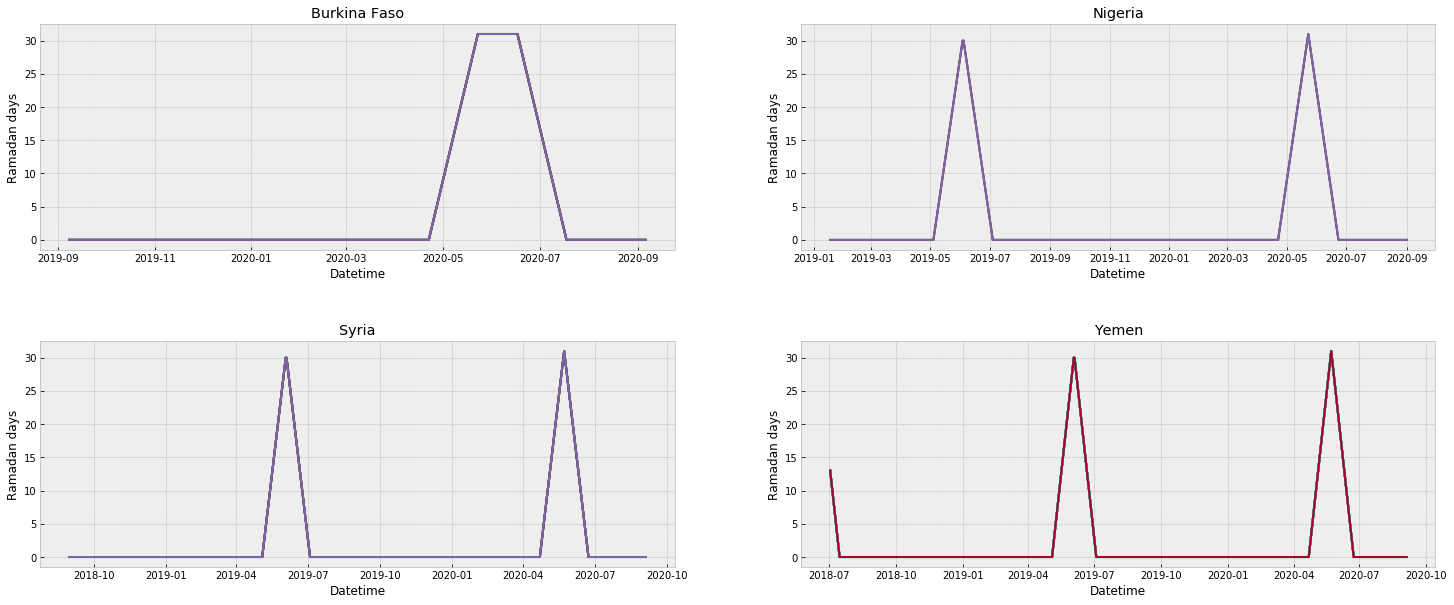

In [20]:
# Plot the original time-series of the FCS indicator for each country.
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (25, 10))
fig.subplots_adjust(hspace = 0.4)
axs = axs.ravel()
for i, country in enumerate(df_SvyWindow.columns.get_level_values(0).unique()):
    axs[i].plot(df_SvyWindow[country])
    axs[i].set_title(country)
    axs[i].set_xlabel("Datetime")
    axs[i].set_ylabel("Ramadan days")
    # Save just the portion of the current axes.
    extent = full_extent(axs[i]).transformed(fig.dpi_scale_trans.inverted())
    extent = axs[i].get_tightbbox(fig.canvas.renderer).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(PATH_TO_SAVE_DATA + "%s/ts_ramadan_%s.png" % (country, country), bbox_inches = extent, dpi = 300)

In [21]:
fig.savefig(PATH_TO_SAVE_DATA + "ts.png", dpi = 100)